In [1]:
import sys
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_colwidth', None)

In [2]:
bench_run_path = os.path.abspath("__file__" + "/../../stream_run")
runs = os.listdir(bench_run_path)
runs.sort()
latest = runs[-1]
fname = bench_run_path + "/" + latest + "/result/result-csv.dat"
fname

'/p/project/ccstao/mueller24/stream/stream_run/000003/result/result-csv.dat'

In [3]:
run_data = pd.read_csv(fname)

In [4]:
run_data.head()

,system,stage,modules,exp,memory_per_array,memory_total,threadspertask,clk_ticks,ntimes,Copy,Scale,Add,Triad,runtime[sec]
0,juwelsbooster,2022,GCC,10,0.0,0.0,1,0.0,200,NaN,NaN,NaN,NaN,1.11
1,juwelsbooster,2022,GCC,10,0.0,0.0,2,3.0,200,8589.9,8589.9,12884.9,12884.9,0.44
2,juwelsbooster,2022,GCC,10,0.0,0.0,4,5.0,200,8589.9,5726.6,11453.2,8589.9,0.44
3,juwelsbooster,2022,GCC,10,0.0,0.0,8,5.0,200,4042.3,4042.3,6442.5,6063.5,0.44
4,juwelsbooster,2022,GCC,10,0.0,0.0,12,7.0,200,2748.8,2748.8,4123.2,4908.5,0.42


In [5]:
def plotBandwidthVsMemory(yLim=[], highlightedX=[]):
    uniqueThreads = run_data['threadspertask'].unique()
    numUnique = len(uniqueThreads)
    fig, axs = plt.subplots(nrows=numUnique, figsize=(12, 15*numUnique))
    for i in range(numUnique):
        threads = uniqueThreads[i]
        axes = axs[i]
        if(yLim): axes.set_ylim(yLim[0],yLim[1])
        streamData = run_data.loc[run_data['threadspertask'] == threads]
        axes.set_title("Stream (OMP Threads: " + str(threads) + ")")
        axes.set_ylabel("Bandwith [MiB/s]")
        axes.set_xlabel('Memory (per Thread) MiB')
        axes.set_xscale('log')
        axes.plot(streamData['memory_total'],  streamData["Copy"], label="Copy")
        axes.plot(streamData['memory_total'], streamData["Scale"],label="Scale")
        axes.plot(streamData['memory_total'],   streamData["Add"],  label="Add")
        axes.plot(streamData['memory_total'], streamData["Triad"],label="Triad")
        for (value, name, color) in highlightedX:
            axes.axvline(x=value, label=name, ls=":", c=color)
        axes.legend(loc=0)
    plt.ioff()
    fig.savefig("BandwidthVsMemory["+str(latest)+"].png", bbox_inches="tight", dpi=fig.dpi)

In [6]:
def plotBandwidthVsTasks(yLim=[], highlightedX=[]):
    uniqueExps = run_data['exp'].unique()
    numUnique = len(uniqueExps)
    fig, axs = plt.subplots(nrows=numUnique, figsize=(12, 15*numUnique))
    for i in range(numUnique):
        memExp = uniqueExps[i]
        axes = axs[i]
        if(yLim): axes.set_ylim(yLim[0],yLim[1])
        streamData = run_data.loc[run_data['exp'] == memExp]
        axes.set_title("Stream (Array Size: 2^"+str(memExp)+"B)")
        axes.set_ylabel("Bandwith in [MiB/s]")
        axes.set_xlabel('OMP Tasks')
        axes.set_xscale('log')
        axes.plot(streamData['threadspertask'], streamData["Copy"], label="Copy")
        axes.plot(streamData['threadspertask'], streamData["Scale"],label="Scale")
        axes.plot(streamData['threadspertask'], streamData["Add"],  label="Add")
        axes.plot(streamData['threadspertask'], streamData["Triad"],label="Triad")
        for (value, name, color) in highlightedX :
            axes.axvline(x=value, label=name, ls=":", c=color)
        axes.legend(loc=0)
    plt.ioff()
    fig.savefig("BandwidthVsTasks["+str(latest)+"].png", bbox_inches="tight", dpi=fig.dpi)

In [7]:
# Calculates a single (a few) number(s) expressing the overall performance of STREAM
def maxBW(run_data):
    streamData = run_data.loc[run_data['clk_ticks'] > 20] # accept only runs where the clock is precise enough
    return [run_data['Copy'].max(),run_data['Scale'].max(),run_data['Add'].max(),run_data['Triad'].max()]

In [8]:
maxBW(run_data)

[1646052.5, 1599289.6, 1655735.2, 1655735.2]

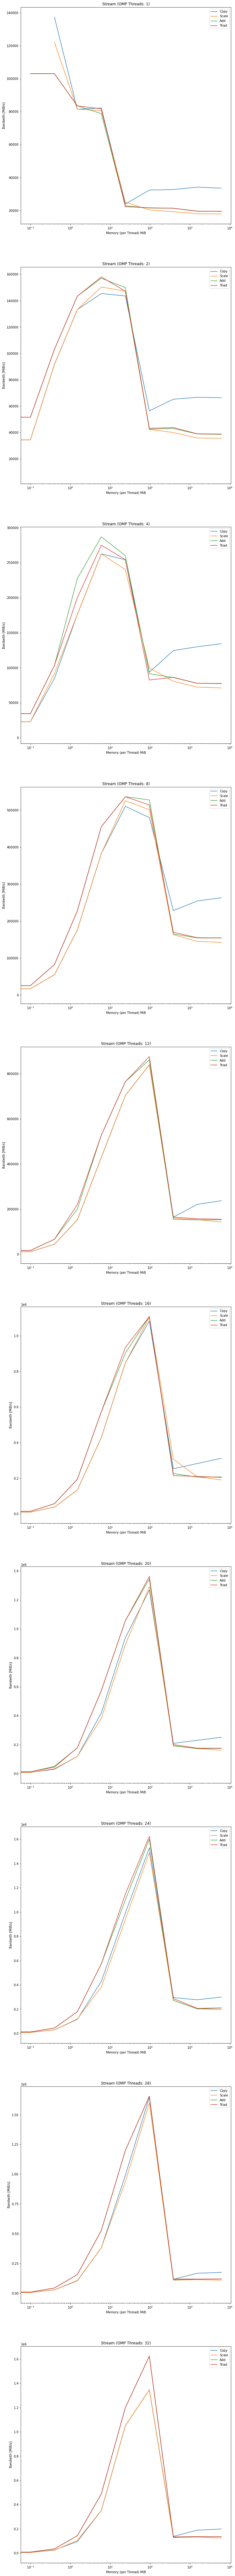

In [9]:
plotBandwidthVsMemory()

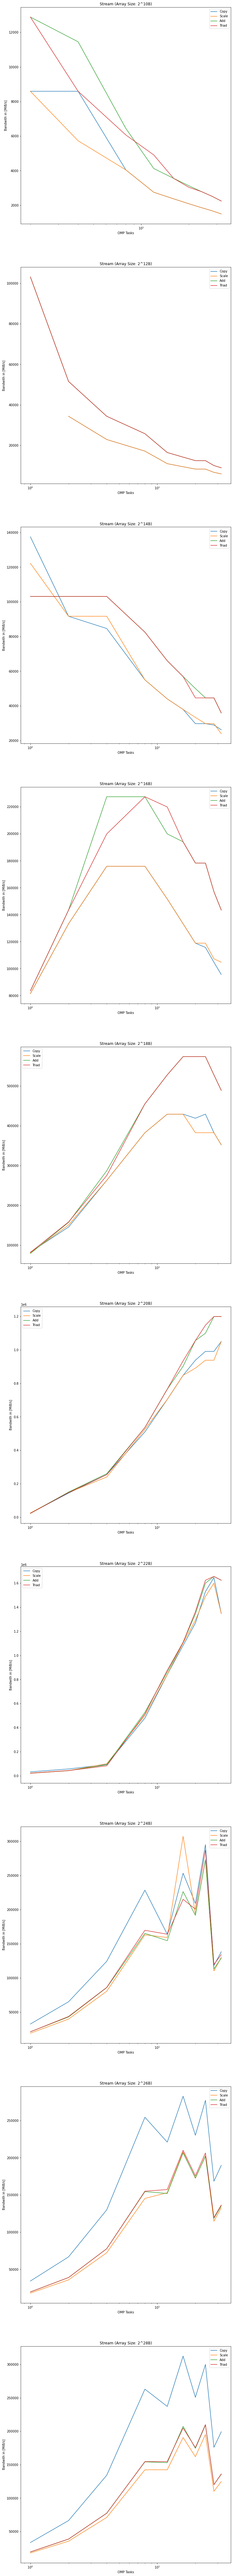

In [10]:
plotBandwidthVsTasks()